# Задачи 1 и 2

P(A - убица) = P(A-убица | у A редкая группа крови) * P(у A редкая группа крови) + P(A -убийца | у A не редкая группа крови) * P (у A не редкая группа крови)
 = P(A-убица | у A редкая группа крови) 

1) Прокурор оценивает P( у А редкая группа крови | A - невиновен ) = 1%, отсюда следует лишь что P( у А не редкая группа крови | A - невиновен ) = 99%, но не то что P(A виновен) = 99%
Вероятность, которую правильно должен был оценить прокурор - P(A-убица | у A редкая группа крови)

2) Свидетельство увеличило вероятность виновности A с (если каждый мог  совершить убийство равновероятно) 1/1000000 до 1/10000.
Исключая свидетельство из материалов дела вероятность что A убица падает в 100 раз.
Заяявление что подсодимый убица с вероятностью 0.01% игнорирует 
P(A - подозреваемый) - то есть полагает эту величину равной 1/10000, что вероятно преуменьшение

P(A-убийца) = P(A-убица | A подозреваемый) * P(A - подозреваемый)
 


# Задача 3

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

Апостериорная вероятность после положительного теста: 0.161017
Апостериорная вероятность после отрицательного теста: 0.000531


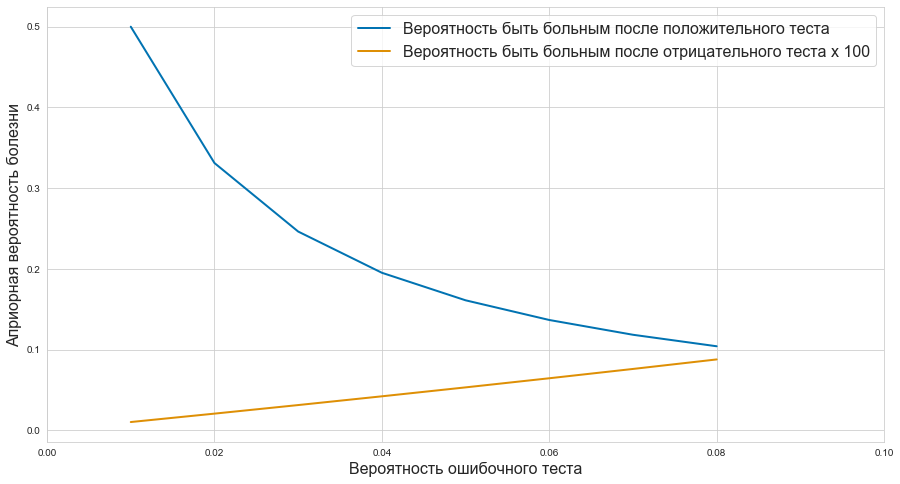

In [10]:
## если data = 1, тест положительный
def compute_posterior(data, prior_prob=0.01, error = 0.05):
    if data == 1:
        return (prior_prob * (1 - error)) / (prior_prob * (1 - error) + (1-prior_prob) * error)
    elif data == 0:
        return (prior_prob * error) / (prior_prob * error + (1-prior_prob) * (1 - error))
    else:
        return None

print("Апостериорная вероятность после положительного теста: %.6f" % compute_posterior(1) )
print("Апостериорная вероятность после отрицательного теста: %.6f" % compute_posterior(0) )

vector_posterior = np.vectorize(compute_posterior, excluded=['data', 'prior_prob'])


xs = np.arange(0.01, 0.09, 0.01)
ys_one = vector_posterior(1, error=xs)
ys_zero = vector_posterior(0, error=xs) * 100

fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111)

ax.plot(xs, ys_one, linewidth=2, label=r'Вероятность быть больным после положительного теста')
ax.plot(xs, ys_zero, linewidth=2, label='Вероятность быть больным после отрицательного теста x 100')

ax.set_xlim((0.0, 0.1))
ax.set_ylabel('Априорная вероятность болезни', fontsize=legend_fontsize)
ax.set_xlabel('Вероятность ошибочного теста', fontsize=legend_fontsize)
ax.legend(fontsize=legend_fontsize)
fig.savefig('intro1.pdf', bbox_inches='tight')
plt.show()

С одной стороны, для максимизации Априорной вероятности болезни в случае положительного исхода нужно минимизировать ошибку false_positive, с другой, в предположении о том, что лечение здорового человека его не убьет, для максимизации числа выживших лучше уменьшать ошибку true_negative. 